# AKINGBENI - Wrangling and EDA of data science salaries.

In [1]:
#Import libraries

#data wrangling libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import misc libraries
import warnings

#Import pycountry for converting countries name
import pycountry

In [2]:
#Read in the dataset
filepath = "./data/ds_salaries (1).csv"
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Information and introduction about dataset

> Data science was described in 2012 as the sexiest job of the century by [Havard Business Review](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century). At the heart of data science is traditional statistics, computer science and computational power, and business domains. The blend of these three fields in different proportions and perspectives has given rise to varying form of data scientists.

> Some, I am among some, argue that roles like data engineers do fit into the term data scientists, perhaps a full stack data scientists. Popular roles that are common under data science are Data Analytics, Data Scientits, Machine Learning Scientists/Researcher, Machine Learning Engineer and more specific roles like data vizualization experts.

> However, while passion is a great deal in whatever one does. Subjects like salaries and opportunities should not be overlooked when in search of a career path. I personally struggled with these. I still have my reservations, but I will be focusing my story on the data in front of us.


### Introduction about dataset
> The dataset contains salary information of over 600 people of different job levels and seniority levels. It contains years between 2020 - 2022 to capture post covid data science information and salaries.

**Features**
>- work_year: The year the salary was paid.
>- experience_level: The experience level in the job during the year with the following possible values: `EN ---> Entry-level / Junior`, `MI ---> Mid-level / Intermediate`, `SE ---> Senior-level / Expert`, `EX ---> Executive-level / Director`
>- employment_type: The type of employement for the role: `PT ---> Part-time`, `FT ---> Full-time`, `CT ---> Contract`, `FL ---> Freelance`
>- job_title: The role worked in during the year.
>- salary: The total gross salary amount paid.
>- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
>- salaryinusd: The salary in USD (FX rate divided by avg. USD rate for the respective year via [Fx](fxdata.foorilla.com).
>- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
>- remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 = No remote work (less than 20%), 50 = Partially remote, 100 = Fully remote (more than 80%)
>- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
>- company_size: The average number of people that worked for the company during the year: `S ---> less than 50 employees(small)`, `M ---> 50 to 250 employees (medium)`, `L ---> more than 250 employees (large)`

[Direct info about dataset on kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

### Personal Motivation aboout the project
- I decided to jump on the project first out of curiousity, second to practise and third to learn to use some new libraries like word cloud...

## Data Wrangling

In [3]:
#Check general head information
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
#Visual Assessment
df.sample(6)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
366,366,2022,SE,FT,Data Engineer,136000,USD,136000,US,0,US,M
288,288,2021,MI,FT,Machine Learning Engineer,43200,EUR,51064,IT,50,IT,L
580,580,2022,SE,FT,Data Analyst,126500,USD,126500,US,100,US,M
268,268,2021,MI,FT,Data Engineer,250000,TRY,28016,TR,100,TR,M
355,355,2022,SE,FT,Data Engineer,50000,GBP,65438,GB,0,GB,M
329,329,2022,MI,FT,Data Analyst,115500,USD,115500,US,100,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
#check the unique values in the work_year columns
df.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [7]:
#Check unique values of experience_level is as expeected

df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [8]:
#Check unique values of employment types
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [9]:
#Chech value counts of different job titles
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [10]:
df.employee_residence.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [11]:
#Check unique values in company size
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

### Data Assessments

- Redundant columns ---> salary, salary_currency, Unnamed column irrelevant, a product of not ignoring the index when it was saved
- work year column should be datetime datatype
- Infromation shorthand entry in experience level is ambigous
- Experience level should be an ordered category type
- Columns of employment type contains ambigous values
- There are varying form of job description in the job title column of the same job. (#Define function that uses str.contains to replace certain job types.)
- Employe Residence and company loaction is ambigous.
- Remote Ratio values can be misleading and data type ought to be string or object
- Company size is an ordinal datatype and should be ordered from small to medium and to large. (Also needs renaming)

### Data Cleaning

In [12]:
#make copy of original dataframe
df_clean = df.copy()

In [13]:
#Check shape of original df before cleaning
df_clean.shape

(607, 12)

### At this stage, cleaning proper begins using the define, code and test framework.

#### Redundant columns ---> salary, salary_currency, Unnamed column irrelevant, a product of not ignoring the index when it was saved

> #### Define
>- drop redundant columns (unnamed, salary, salary_currency)

#### Code

In [14]:
#Drop redundant columns
df_clean.drop(columns = ["Unnamed: 0", "salary", "salary_currency"], inplace = True)

#### Test

In [15]:
cols = ["Unnamed: 0", "salary", "salary_currency"]
[col in df_clean.columns for col in cols] #Check if each dropped column is in df_clean

[False, False, False]

#### Work year column should be datetime datatype

> #### Define
> - Convert work year column to datetime object

#### Code

In [16]:
#Use pd datetime to convert to dataetime object

df_clean["work_year"] = pd.to_datetime(df.work_year, format = "%Y")

#### Test

In [17]:
df_clean.work_year.dtype

dtype('<M8[ns]')

#### Infromation shorthand entry in experience level is ambigous and no category ordering

> #### Define
>- Use the series.map to replace the values
>- Use pd.api to convert to category datatype with order

#### Code

In [18]:
df_clean.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [19]:
#Construct dictionary to replace specific values
sh_exp = list(df_clean.experience_level.unique())
full_exp = ["Mid-level", "Senior-level", "Entry-level", "Executive-level"]
experience_dict = dict(zip(sh_exp, full_exp))
experience_dict

{'MI': 'Mid-level',
 'SE': 'Senior-level',
 'EN': 'Entry-level',
 'EX': 'Executive-level'}

In [20]:
#Replace values of experience level
df_clean["experience_level"] = df_clean.experience_level.map(experience_dict)

In [21]:
#Converting experience level to ordered category type
ordered_experience = ["Entry-level", "Mid-level", "Senior-level", "Executive-level"]
experience_dtype = pd.api.types.CategoricalDtype(categories = ordered_experience, ordered=True)
df_clean["experience_level"] = df_clean.experience_level.astype(experience_dtype)

#### Test

In [22]:
df_clean["experience_level"].unique()

['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level']
Categories (4, object): ['Entry-level' < 'Mid-level' < 'Senior-level' < 'Executive-level']

#### Columns of employment type contains ambigous values

> #### Define
> - Use pd series.map to replace values

#### Code

In [23]:
#Creating dictionary for mapping
sh_emp_type = list(df_clean.employment_type.unique())
emp_type_full = ["Full Time", "Contract", "Part Time", "Freelance"]
emp_type_dict = dict(zip(sh_emp_type, emp_type_full))

In [24]:
#Renaming values using the series.map method

df_clean["employment_type"] = df_clean.employment_type.map(emp_type_dict)

#### Test

In [25]:
df_clean.employment_type.unique()

array(['Full Time', 'Contract', 'Part Time', 'Freelance'], dtype=object)

#### There are varying form of job description in the job title column of the same job.

> #### Define
>- Convert job description column to lower case character
> - Define function that replaces the chaarcters based on certain conditions

#### Code

In [26]:
#Convert job_title to lower character

df_clean["job_title"] = df_clean.job_title.str.lower()

In [27]:
#Define function for converting strings in job title column
def str_replace(row):
    
    """Function replaces the values 
    with appropriate data science roles. E.g 
    ML with machine learning"""
    
    if "data sci" in row:
        return "Data Scientist"
    elif "data engineer" in row:
        return "Data Engineer"
    elif "data analy" in row:
        return "Data Analyst"
    elif "machine learning" in row:
        return "Machine Learning"
    elif row in ["ml engineer", "computer vision engineer", 
                 "computer vision software engineer", "nlp engineer", 
                 "3d computer vision researcher", "ai scientist"]:
        return "Machine Learning"
    elif "data architect" in row:
        return "Data Architect"
    elif row == "etl developer":
        return "Data Engineer"
    elif row in ["data specialist", "head of data"]:
        return "Data Scientist"
    else:
        return row

In [28]:
#Apply function defined above

df_clean["job_title"] = df_clean["job_title"].apply(str_replace)

#capitalize each word to have uniformity

df["job_title"] = df_clean["job_title"].str.capitalize()

#### Test

In [29]:
df["job_title"].value_counts()

Data scientist        198
Data engineer         160
Data analyst          131
Machine learning       86
Research scientist     16
Data architect         12
Analytics engineer      4
Name: job_title, dtype: int64

#### Employe Residence and Company loaction is ambigous.

> #### Define
> - Use pyconutry library to replace short hand names

#### Code

In [30]:
#Use pycountry to extarct country names
df_clean["employee_residence_iso"] = [pycountry.countries.get(alpha_2 = country).alpha_3 for country in df_clean.employee_residence]
df_clean["company_location_iso"] = [pycountry.countries.get(alpha_2 = country).alpha_3 for country in df_clean.company_location]

df_clean["employee_residence"] = [pycountry.countries.get(alpha_2 = country).name for country in df_clean.employee_residence]
df_clean["company_location"] = [pycountry.countries.get(alpha_2 = country).name for country in df_clean.company_location]

#### Test

In [31]:
df_clean["employee_residence"].unique()[:10]

array(['Germany', 'Japan', 'United Kingdom', 'Honduras', 'United States',
       'Hungary', 'New Zealand', 'France', 'India', 'Pakistan'],
      dtype=object)

In [32]:
df_clean["company_location"].unique()[:10]

array(['Germany', 'Japan', 'United Kingdom', 'Honduras', 'United States',
       'Hungary', 'New Zealand', 'France', 'India', 'Pakistan'],
      dtype=object)

#### Remote Ratio values can be misleading and data type ought to be string or object

> #### Define
> - Convert values to appropriate names
>- Ensure the datatype is object

#### Code

In [33]:
#Create map dictionary for mapping with remote_ratio

remote_map = {0: "<20% Remote",
             50: "Partial Remote",
             100: ">80% Remote"}

In [34]:
#Assign new mapping to the column

df_clean["remote_ratio"] = df_clean.remote_ratio.map(remote_map)

#### Test

In [35]:
df_clean.remote_ratio.unique()

array(['<20% Remote', 'Partial Remote', '>80% Remote'], dtype=object)

#### Company size is an ordinal datatype and should be ordered from small to medium and to large. (Also needs renaming)

> #### Define
> - Rename values and convert data to an ordered category

#### Code

In [36]:
#make map dictionary for renameing

size_map = {"L": "Large",
           "S": "Small",
           "M": "Medium"}

#Rename values in the comapny size column
df_clean["company_size"] = df_clean.company_size.map(size_map)

In [37]:
#Create ordered category
size_list = ["Small", "Medium", "Large"]
size_cat = pd.api.types.CategoricalDtype(categories=size_list, ordered=True)

#Change category to ordered category
df_clean["company_size"] = df_clean["company_size"].astype(size_cat)

#### Test

In [38]:
df_clean.company_size.unique()

['Large', 'Small', 'Medium']
Categories (3, object): ['Small' < 'Medium' < 'Large']

## Exploratory Data Analysis

> *We will be using the question-vizulaization-observation framework in this section. And the sections will be split into investigating univariate plots, bivariate plots and multivariate plots*

### General data description

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   work_year               607 non-null    datetime64[ns]
 1   experience_level        607 non-null    category      
 2   employment_type         607 non-null    object        
 3   job_title               607 non-null    object        
 4   salary_in_usd           607 non-null    int64         
 5   employee_residence      607 non-null    object        
 6   remote_ratio            607 non-null    object        
 7   company_location        607 non-null    object        
 8   company_size            607 non-null    category      
 9   employee_residence_iso  607 non-null    object        
 10  company_location_iso    607 non-null    object        
dtypes: category(2), datetime64[ns](1), int64(1), object(7)
memory usage: 44.3+ KB


In [40]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_iso,company_location_iso
0,2020-01-01,Mid-level,Full Time,Data Scientist,79833,Germany,<20% Remote,Germany,Large,DEU,DEU
1,2020-01-01,Senior-level,Full Time,Machine Learning,260000,Japan,<20% Remote,Japan,Small,JPN,JPN
2,2020-01-01,Senior-level,Full Time,Data Engineer,109024,United Kingdom,Partial Remote,United Kingdom,Medium,GBR,GBR
3,2020-01-01,Mid-level,Full Time,Data Analyst,20000,Honduras,<20% Remote,Honduras,Small,HND,HND
4,2020-01-01,Senior-level,Full Time,Machine Learning,150000,United States,Partial Remote,United States,Large,USA,USA


In [41]:
df_clean.select_dtypes("object").describe()

,employment_type,job_title,employee_residence,remote_ratio,company_location,employee_residence_iso,company_location_iso
count,607,607,607,607,607,607,607
unique,4,7,57,3,50,57,50
top,Full Time,Data Scientist,United States,>80% Remote,United States,USA,USA
freq,588,198,332,381,355,332,355


In [42]:
df_clean.select_dtypes("number").describe()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


In [43]:
df_clean.select_dtypes("category").describe()

,experience_level,company_size
count,607,607
unique,4,3
top,Senior-level,Medium
freq,280,326


From the above summary statistics, we know the following:
- Most of the employment type is Full time
- The highest frequency ocunts of job_title is data scientist
- The employee residence and company location have United States as their highest frequency count.
- The highest frequency count of the experience_level is the senir level
- The mean salary for data science job is $112,672

### Univariate Analysis

#### What is the distribution of the experience_level?

In [44]:
#Generate base color
base_color = sns.color_palette()[0]

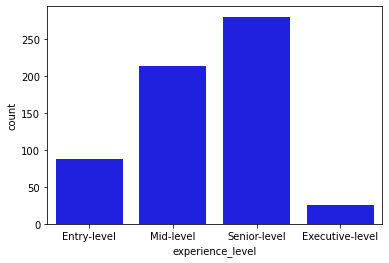

In [45]:
#distribution of experience level

sns.countplot(data= df_clean, x = "experience_level", color = "b");

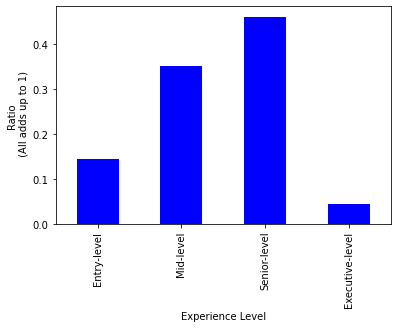

In [46]:
#Make plot relative
df_clean["experience_level"].value_counts(normalize = True).sort_index().plot(kind = "bar", color = "b")
plt.xlabel("Experience Level")
plt.ylabel("Ratio\n (All adds up to 1)");

**Observation:** The data consists mostly of Mid-level roles and Senior-level roles with a little over 10% as entry roles and less than 10% Executive roles.

#### Question: What is the distribution of employment type?

<AxesSubplot:xlabel='employment_type', ylabel='count'>

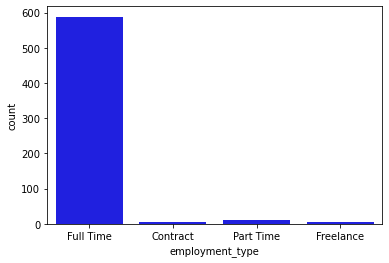

In [47]:
sns.countplot(data = df_clean, x = "employment_type", color = "b")

**Observation:** Most of the jobs in the dataset are `full time` with very inconsequential amount attributed to other `employment type`

#### Question: Distribution of salary?

In [48]:
df_clean.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

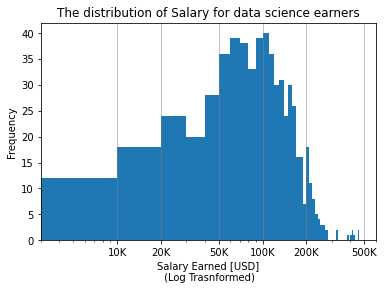

In [49]:
bins = np.arange(0, 600000, 10000)
plt.hist(data = df_clean, x = "salary_in_usd", bins = bins)
plt.xscale("log")
ticks = [1000, 10000, 20000, 50000, 100000, 200000, 500000]
tick_label = ["1K", "10K", "20K", "50K", "100K", "200K", "500K"]
plt.xticks(ticks, tick_label)
plt.xlim(3000, 600000)
plt.grid(axis = "x", alpha = 0.6, color = "grey")
plt.xlabel("Salary Earned [USD]\n (Log Trasnformed)")
plt.ylabel("Frequency")
plt.title("The distribution of Salary for data science earners");

**Observation:** 
- The distribution of Data Science Salaries mainly between 50K to above 100K but less than 200K
- We also observe a general gradual increase in the different income groups which peaks at area between 50K - 100K and then begin to suffer decline.
- There are extreme outliers at above 200K.
- This dataset can point to the distribution of work experience that we have in the dataset, an information we would get to know better on a  bivariate plot.

In [50]:
#Trying to see the outliers of above 200K
df_clean[df_clean["salary_in_usd"] > 200000]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_iso,company_location_iso
1,2020-01-01,Senior-level,Full Time,Machine Learning,260000,Japan,<20% Remote,Japan,Small,JPN,JPN
25,2020-01-01,Executive-level,Full Time,Data Scientist,325000,United States,>80% Remote,United States,Large,USA,USA
33,2020-01-01,Mid-level,Full Time,research scientist,450000,United States,<20% Remote,United States,Medium,USA,USA
37,2020-01-01,Entry-level,Full Time,Machine Learning,250000,United States,Partial Remote,United States,Large,USA,USA
63,2020-01-01,Senior-level,Full Time,Data Scientist,412000,United States,>80% Remote,United States,Large,USA,USA
74,2021-01-01,Executive-level,Full Time,Data Scientist,235000,United States,>80% Remote,United States,Large,USA,USA
78,2021-01-01,Mid-level,Contract,Machine Learning,270000,United States,>80% Remote,United States,Large,USA,USA
93,2021-01-01,Senior-level,Full Time,Data Engineer,276000,United States,<20% Remote,United States,Large,USA,USA
97,2021-01-01,Mid-level,Full Time,Data Analyst,450000,United States,>80% Remote,United States,Large,USA,USA
115,2021-01-01,Entry-level,Full Time,Machine Learning,225000,United States,>80% Remote,United States,Large,USA,USA


**Observation**
- Dominated by the country: United States, most earners above 200K are Senior Level, Executive with few Mid levels and two entry level which both have job title as Machine Learning (Remember, I combined many sub fields, Ml engineer, Ml Scientist, AI scientist, e.t.c.). I do however consider both entry level in this situation as an outrageous outlier and needs to dropped from the dataset to avoid skewness of analysis

In [51]:
#Create logical mask series for subsetting the data and dropping them
mask_entry = df_clean["experience_level"] == "Entry-level"
mask_200K = df_clean["salary_in_usd"] > 200000

df_clean.drop(df_clean[mask_entry & mask_200K].index, inplace = True)

In [52]:
#Test -- check index 37 and index 115

df_clean.iloc[[37, 115], :]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_iso,company_location_iso
38,2020-01-01,Entry-level,Full Time,Data Analyst,10000,Nigeria,>80% Remote,Nigeria,Small,NGA,NGA
117,2021-01-01,Mid-level,Full Time,Data Scientist,40189,Greece,>80% Remote,Greece,Medium,GRC,GRC


**How does the adoption of remote work look like in Data Science Roles?**

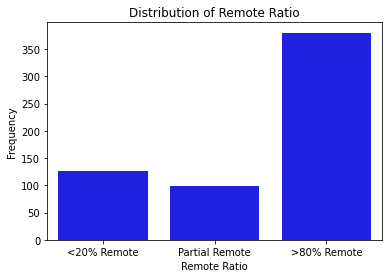

In [208]:
sns.countplot(data = df_clean, x = "remote_ratio", color = "b")
plt.xlabel("Remote Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Remote Ratio");

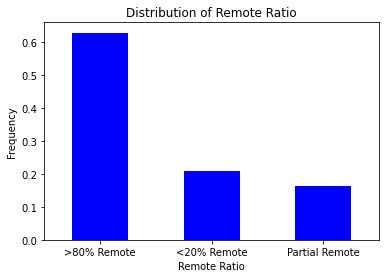

In [209]:
#Make above plot into a relative plot
df_clean["remote_ratio"].value_counts(normalize = True).plot(kind = "bar", color = "b")
plt.xlabel("Remote Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Remote Ratio")
plt.xticks(rotation = 0);

**Observation**
- More than 60% of work presented in the dataset has high remote culture (>80% Remote)

In [55]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_iso,company_location_iso
0,2020-01-01,Mid-level,Full Time,Data Scientist,79833,Germany,<20% Remote,Germany,Large,DEU,DEU
1,2020-01-01,Senior-level,Full Time,Machine Learning,260000,Japan,<20% Remote,Japan,Small,JPN,JPN
2,2020-01-01,Senior-level,Full Time,Data Engineer,109024,United Kingdom,Partial Remote,United Kingdom,Medium,GBR,GBR
3,2020-01-01,Mid-level,Full Time,Data Analyst,20000,Honduras,<20% Remote,Honduras,Small,HND,HND
4,2020-01-01,Senior-level,Full Time,Machine Learning,150000,United States,Partial Remote,United States,Large,USA,USA


#### What is the company size distribution?

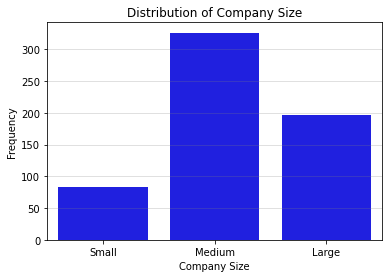

In [211]:
sns.countplot(data = df_clean, x = "company_size", color = "b")
plt.grid(axis = "y", color = "grey", alpha = 0.3)
plt.xlabel("Company Size")
plt.ylabel("Frequency")
plt.title("Distribution of Company Size");

**Obseravtion**
- Medium companies have the highest bar.

#### What is the distribution of the job_title?

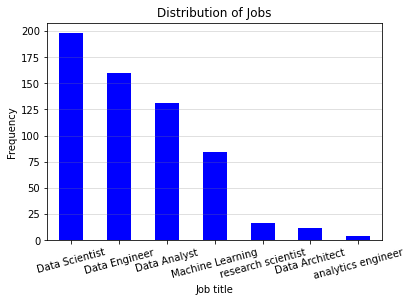

In [212]:
df_clean["job_title"].value_counts().plot(kind = "bar", color = "b")
plt.grid(axis = "y", color = "grey", alpha = 0.3)
plt.xticks(rotation = 15)
plt.xlabel("Job title")
plt.ylabel("Frequency")
plt.title("Distribution of Jobs");

**Observation**
- The role of a data scientist takes the lead followed by the role of a data engineer, then the role of a data analyst, followed by machine learning and the rest...

### Bivariate Analysis

In [58]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_iso,company_location_iso
0,2020-01-01,Mid-level,Full Time,Data Scientist,79833,Germany,<20% Remote,Germany,Large,DEU,DEU
1,2020-01-01,Senior-level,Full Time,Machine Learning,260000,Japan,<20% Remote,Japan,Small,JPN,JPN
2,2020-01-01,Senior-level,Full Time,Data Engineer,109024,United Kingdom,Partial Remote,United Kingdom,Medium,GBR,GBR
3,2020-01-01,Mid-level,Full Time,Data Analyst,20000,Honduras,<20% Remote,Honduras,Small,HND,HND
4,2020-01-01,Senior-level,Full Time,Machine Learning,150000,United States,Partial Remote,United States,Large,USA,USA


#### The relationship between the experience_level and the salary received

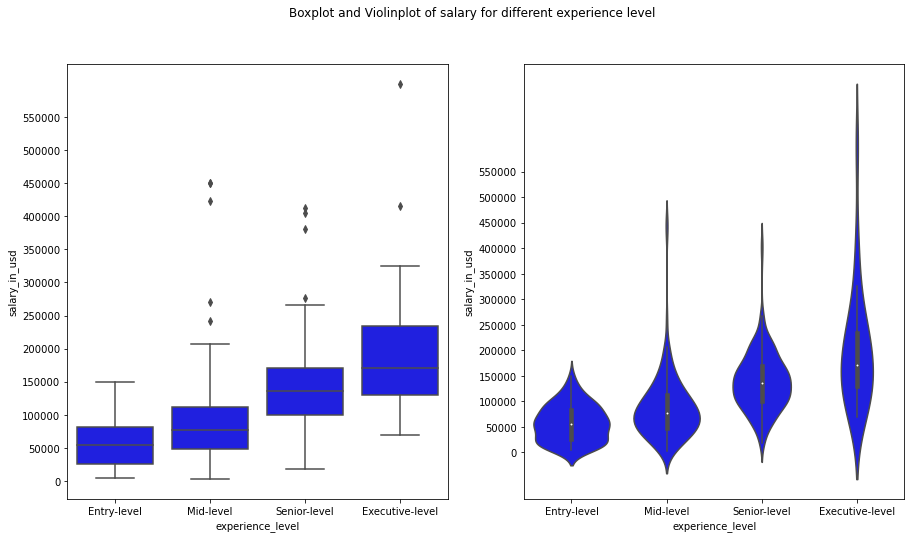

In [214]:
#Using the boxplot
plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.boxplot(data = df_clean, x = "experience_level", y = "salary_in_usd", color = "b")
y_ticks = np.arange(0, 600000, 50000)
plt.yticks(y_ticks, y_ticks)


plt.subplot(1, 2, 2)
sns.violinplot(data = df_clean, x = "experience_level", y = "salary_in_usd", color = "b")
y_ticks = np.arange(0, 600000, 50000)
plt.yticks(y_ticks, y_ticks)

plt.suptitle("Boxplot and Violinplot of salary for different experience level");

**Observation**
- The median income of entry level is around 50,000 USD, and it increases as the seniority increases.
- However while the difference between the salary distribution and median income of entry level and mid level is not that much, the difference between the mid level and senior level is notable with senior level median salary being around the double median salary of mid level.

#### The title of the job for each salary earned.

In [60]:
order = df_clean.groupby("job_title")["salary_in_usd"].median().sort_values(ascending = True).index

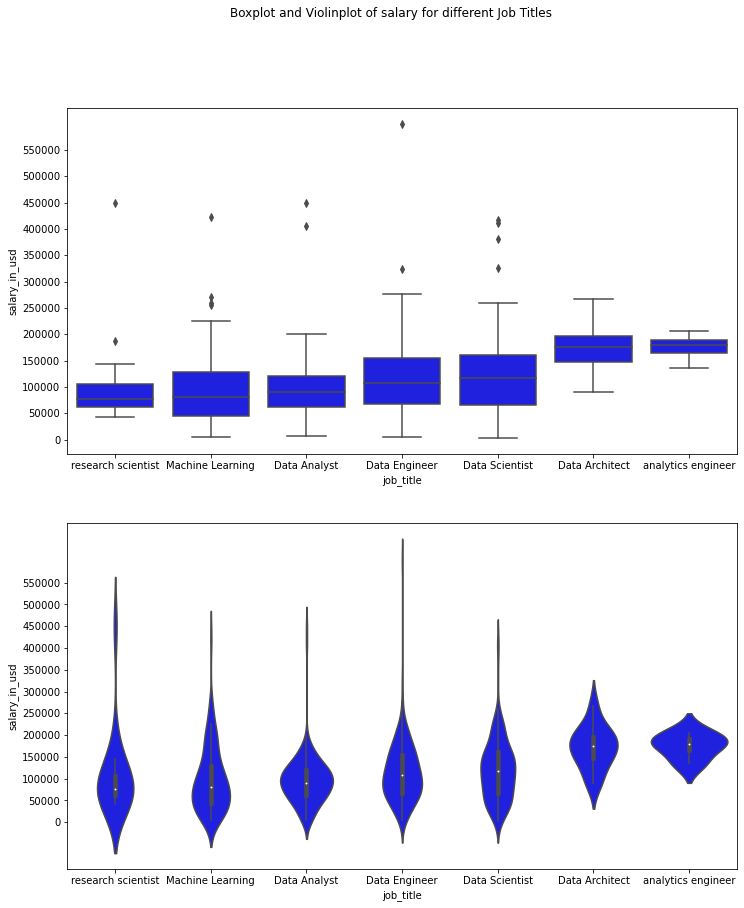

In [215]:
plt.figure(figsize = [12, 14])
plt.subplot(2, 1, 1)
sns.boxplot(data = df_clean, x = "job_title", y = "salary_in_usd", color = "b", order=order)
y_ticks = np.arange(0, 600000, 50000)
plt.yticks(y_ticks, y_ticks)

plt.subplot(2, 1, 2)
sns.violinplot(data = df_clean, x = "job_title", y = "salary_in_usd", color = "b", order = order)
y_ticks = np.arange(0, 600000, 50000)
plt.yticks(y_ticks, y_ticks)

plt.suptitle("Boxplot and Violinplot of salary for different Job Titles");

**Observation**
- The dataset informs that an analytics engineer is the highest median income earner. This can  be due to the very small number of analytics engineer present in the dataset as we saw in a previous bar chart.
- Surprisingly is that the median income of Machine Learning(ML) is lower than a data analyst. However as we check the distribution of the violin plot, we observe that there are ML practictioners that earn higher salary than Data Analyst. The higher median can be as result of the count of different job titles or different count of experience level for different job

#### job_title and experience

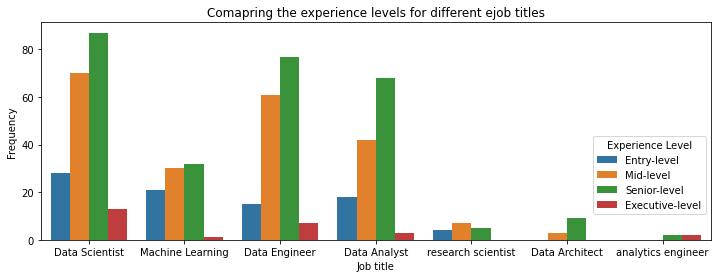

In [217]:
plt.figure(figsize = [12, 4])

sns.countplot(data = df_clean, x = "job_title", hue = "experience_level")
plt.legend(loc = 1, bbox_to_anchor = [1, 0.5], title = "Experience Level")

plt.xlabel("Job title")
plt.ylabel("Frequency")
plt.title("Comapring the experience levels for different ejob titles");

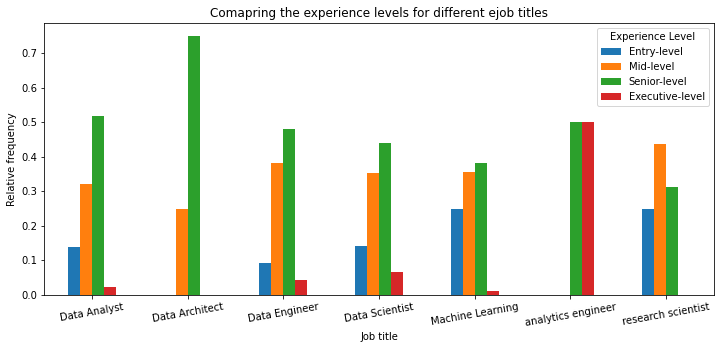

In [219]:
#Generate the 
df_clean.groupby("job_title")["experience_level"].value_counts(normalize = True).unstack().plot(kind = "bar", figsize = [12, 5])
plt.xticks(rotation = 10)

plt.xlabel("Job title")
plt.ylabel("Relative frequency")
plt.title("Comapring the experience levels for different ejob titles")
plt.legend(title = "Experience Level");

**Observation**
- From the above barplot we see that the high salary for the different job titles is due to how the experience level mix diffeere in different job title.
- For instance ML have a fair smaller amount of senior entry roles than Data Architect, Data Analyst and most job titles.

- A better obseravtion by multivariate analysis would be to check the comparism of salary by job titles for different experience level.

In [66]:
import plotly.express as px

In [64]:
group = df_clean.groupby(["company_location_iso", "company_location"]).agg({"salary_in_usd": np.mean, 
                                                                    "job_title": np.size}).reset_index()

In [70]:
group.rename(columns = {"job_title": "count"}, inplace=True)

In [71]:
px.scatter_geo(group, locations="company_location_iso",
                     color="count", # which column to use to set the color of markers
                     hover_name="company_location", # column added to hover information
                     size="salary_in_usd", 
               projection= "natural earth")

From the above loaction plot, we can spot that United States is a spectacular region with highest count of data science jobs and a big dot which indicates a high mean salary in the region. Other contries have a high mean salary like Russia Federation but none records high count in the dataset like USA.

#### Time Series Evaluation of the salary

In [76]:
df_ts = df_clean[["work_year", "salary_in_usd"]]
df_ts.head()

,work_year,salary_in_usd
0,2020-01-01,79833
1,2020-01-01,260000
2,2020-01-01,109024
3,2020-01-01,20000
4,2020-01-01,150000


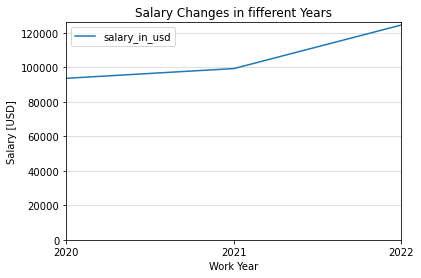

In [220]:
df_ts.groupby("work_year").mean().plot()
plt.grid(axis = "y", alpha = 0.5)
plt.yticks(range(0, 130_000, 20_000))
plt.xlabel("Work Year")
plt.ylabel("Salary [USD]")
plt.title("Salary Changes in fifferent Years");

It is noticeable that the mean price for salaries for the data science roles have increased over the years, with an increase in mean salaries that makes the mean salaries above 120K. However this change can be investigated further with the plots below.

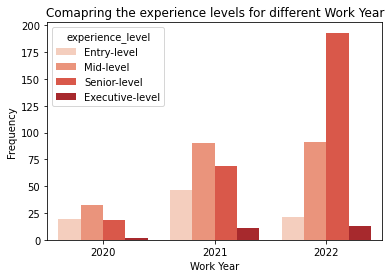

In [221]:
sns.countplot(data=df_clean, x = "work_year", hue = "experience_level", palette = "Reds")
plt.xticks(range(0, 3), [2020, 2021, 2022])

plt.xlabel("Work Year")
plt.ylabel("Frequency")
plt.title("Comapring the experience levels for different Work Year");

From the countplot above, it seems that the reason for the change in the salaries is the apparent change in the seniority level as shown in 2022 above in comaprism with 2021. To investigate this further, I will make a certain subset and compare the salries of different jobs for different years but consider only the seniority level in a multi variate plot

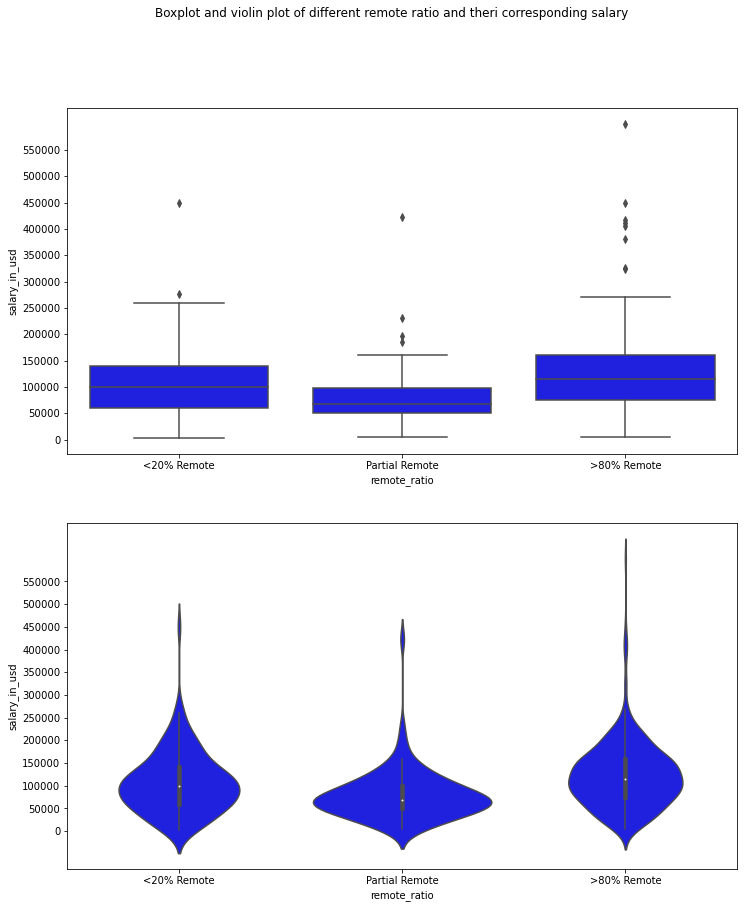

In [222]:
plt.figure(figsize = [12, 14])
plt.subplot(2, 1, 1)
sns.boxplot(data = df_clean, x = "remote_ratio", y = "salary_in_usd", color = "b")
y_ticks = np.arange(0, 600000, 50000)
plt.yticks(y_ticks, y_ticks)

plt.subplot(2, 1, 2)
sns.violinplot(data = df_clean, x = "remote_ratio", y = "salary_in_usd", color = "b")
y_ticks = np.arange(0, 600000, 50000)
plt.yticks(y_ticks, y_ticks)

plt.suptitle("Boxplot and violin plot of different remote ratio and theri corresponding salary");

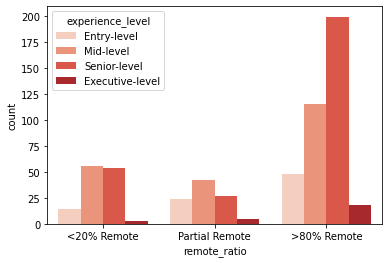

In [198]:
sns.countplot(data=df_clean, x = "remote_ratio", hue = "experience_level", palette = "Reds")

plt.xlabel("Job title")
plt.ylabel("Frequency")
plt.title("Comapring the experience levels for different ejob titles");;

**Observation:**
- From the above we observe that Partial Remote jobs have more ratio of people as entry level and mid level than `<20% remote` and `>80% Remote`
- This fact may be reason why the salary is way lesser than the two extremes of <20% remote and >80% remote.

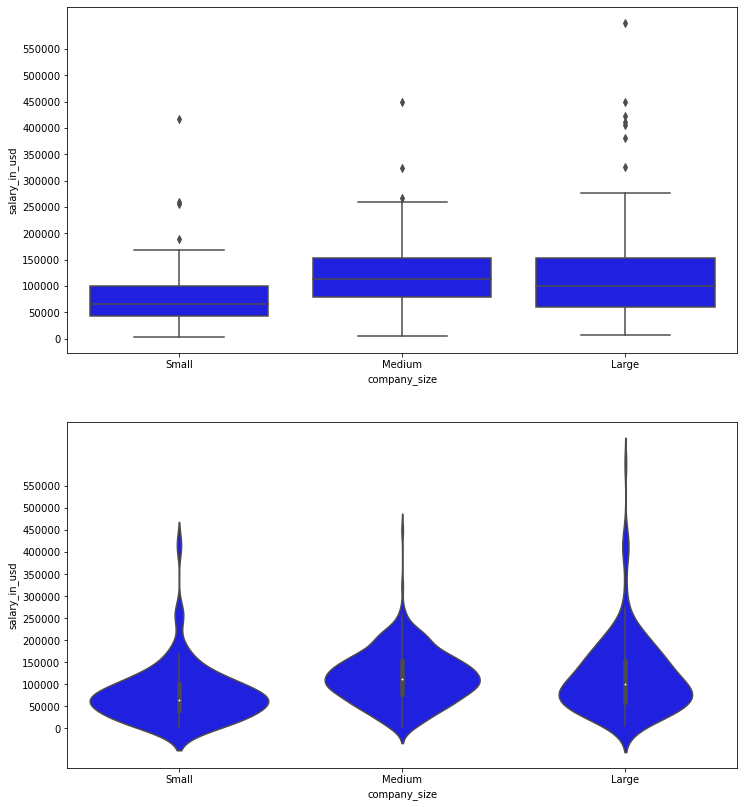

In [189]:
plt.figure(figsize = [12, 14])
plt.subplot(2, 1, 1)
sns.boxplot(data = df_clean, x = "company_size", y = "salary_in_usd", color = "b")
y_ticks = np.arange(0, 600000, 50000)
plt.yticks(y_ticks, y_ticks)

plt.subplot(2, 1, 2)
sns.violinplot(data = df_clean, x = "company_size", y = "salary_in_usd", color = "b")
y_ticks = np.arange(0, 600000, 50000)
plt.yticks(y_ticks, y_ticks);

**Observation:**

- The distribution of salary of large companies span all the way up to 55K+
- The mode of Medium company earners earn more than small or large companies.

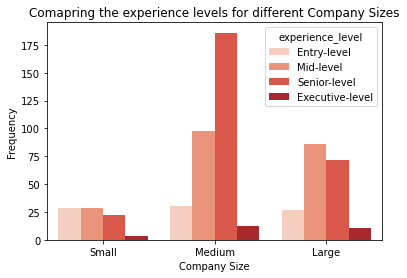

In [223]:
sns.countplot(data=df_clean, x = "company_size", hue = "experience_level", palette = "Reds")

plt.xlabel("Company Size")
plt.ylabel("Frequency")
plt.title("Comapring the experience levels for different Company Sizes");

- Medium companies have more senior roles than other company size.

### Multivariate Plots

In [125]:
df_seniority = df_clean[df_clean["experience_level"] == "Senior-level"]
display(df_seniority.head())
print(f"The shape of senior level data set is {df_seniority.shape[0]} rows and {df_seniority.shape[1]} columns")

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_iso,company_location_iso
1,2020-01-01,Senior-level,Full Time,Machine Learning,260000,Japan,<20% Remote,Japan,Small,JPN,JPN
2,2020-01-01,Senior-level,Full Time,Data Engineer,109024,United Kingdom,Partial Remote,United Kingdom,Medium,GBR,GBR
4,2020-01-01,Senior-level,Full Time,Machine Learning,150000,United States,Partial Remote,United States,Large,USA,USA
6,2020-01-01,Senior-level,Full Time,Data Scientist,190000,United States,>80% Remote,United States,Small,USA,USA
9,2020-01-01,Senior-level,Full Time,Data Engineer,125000,New Zealand,Partial Remote,New Zealand,Small,NZL,NZL


The shape of senior level data set is 280 rows and 11 columns


#### Change in salaries of different jobs over the years.

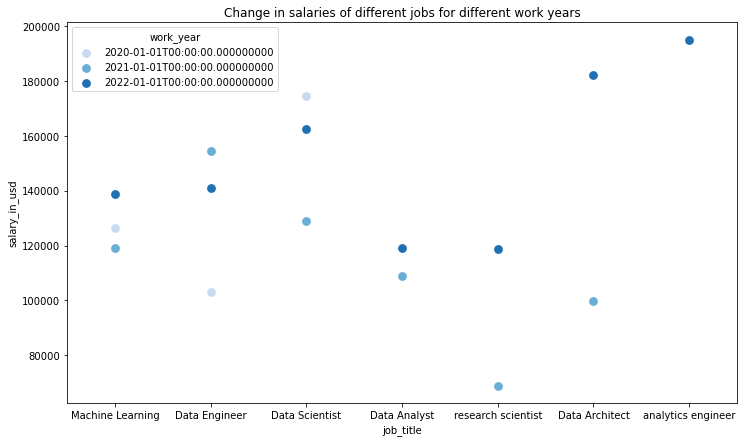

In [224]:
plt.figure(figsize = [12, 7])
sns.pointplot(data = df_seniority, x = "job_title", y = "salary_in_usd", hue = "work_year",
            palette = "Blues", linestyles="", dodge = 0.0, ci = False)

plt.title("Change in salaries of different jobs for different work years");

#### Change in salaries of experience level over the years

In [138]:
df_ds = df_clean[df_clean["job_title"] == "Data Scientist"]
display(df_ds.head())
print(f"The shape of data scientist job title data set is {df_ds.shape[0]} rows and {df_ds.shape[1]} columns")

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_iso,company_location_iso
0,2020-01-01,Mid-level,Full Time,Data Scientist,79833,Germany,<20% Remote,Germany,Large,DEU,DEU
6,2020-01-01,Senior-level,Full Time,Data Scientist,190000,United States,>80% Remote,United States,Small,USA,USA
7,2020-01-01,Mid-level,Full Time,Data Scientist,35735,Hungary,Partial Remote,Hungary,Large,HUN,HUN
10,2020-01-01,Entry-level,Full Time,Data Scientist,51321,France,<20% Remote,France,Small,FRA,FRA
11,2020-01-01,Mid-level,Full Time,Data Scientist,40481,India,<20% Remote,India,Large,IND,IND


The shape of data scientist job title data set is 198 rows and 11 columns


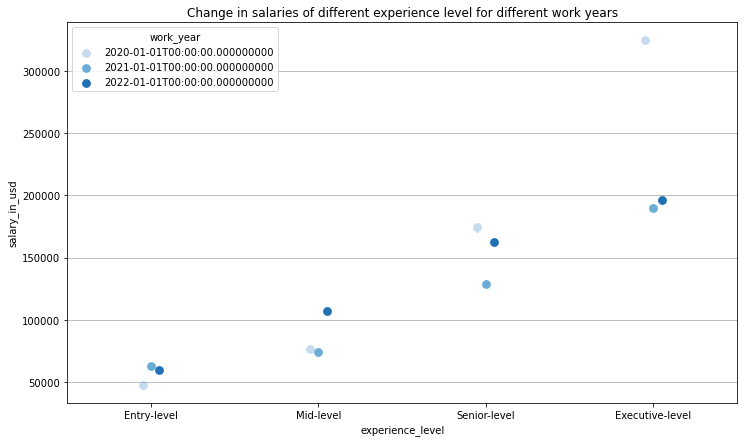

In [225]:
plt.figure(figsize = [12, 7])
sns.pointplot(data = df_ds, x = "experience_level", y = "salary_in_usd", hue = "work_year",
            palette = "Blues", linestyles="", dodge = 0.1, ci = True)
plt.grid(axis = "y")
plt.title("Change in salaries of different experience level for different work years");

#### Using four features for multivariate analysis (salary, job title, work_year and experience level)

In [151]:
import warnings
warnings.filterwarnings(action = "ignore", category = UserWarning)

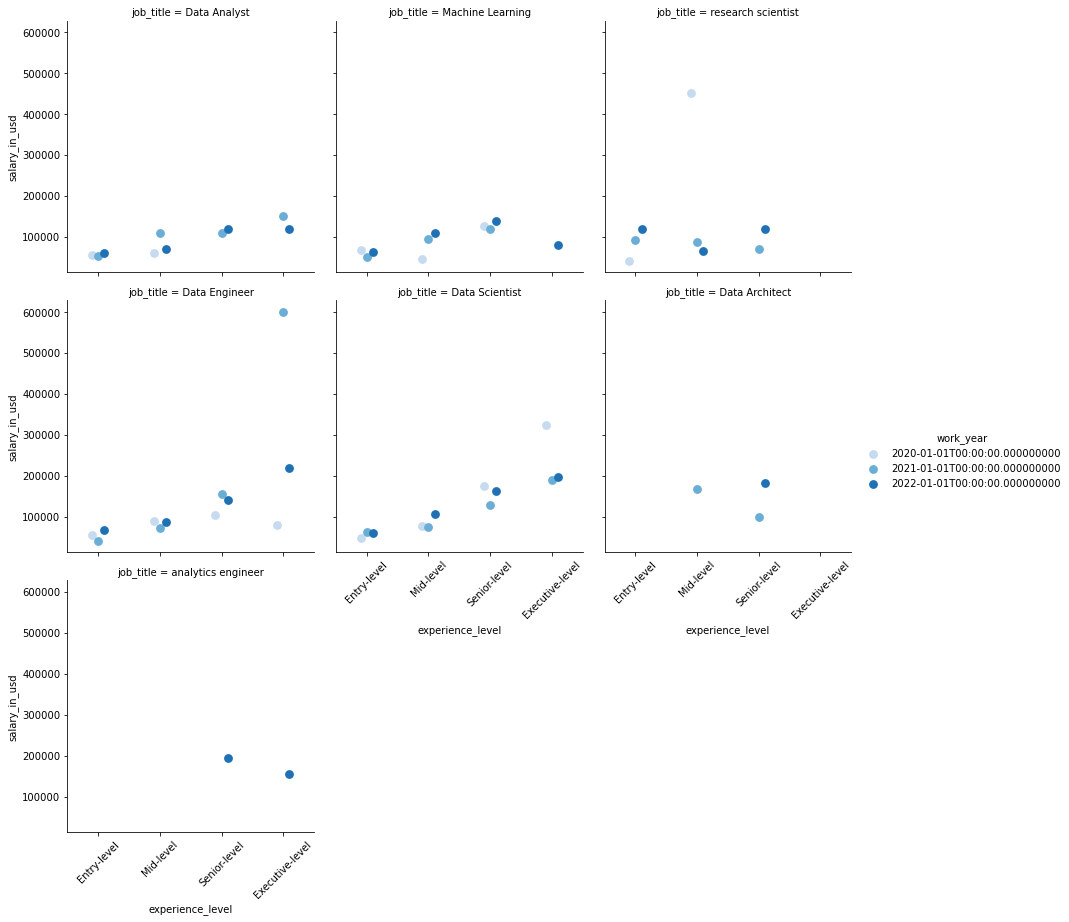

In [185]:
job_order = df_clean.groupby("job_title")["salary_in_usd"].mean().sort_values().index
g = sns.factorplot(x="experience_level", y="salary_in_usd", hue="work_year", data=df_clean,
               col="job_title", col_wrap=3, size=4,
               dodge=.2, join=False, palette = "Blues", ci = True, col_order=job_order)

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=45)

**Observation:**
- From the above multivariate plots, it shows us that much of the yearly increase in salaries of data scientist is affected mainly by the experience level and not much to do with the year as opposed the suggestion we saw in an earlier bivariate plot.
- We also observe that job titles at the end of the spectrum of high salary are mainly new generational (2021 and 2022) and they also do not have entry level entries associated with them. (The Facet grid was ordered in order of increasing salary of the different job titles).

### Save dataset

In [201]:
df_clean.to_csv("ds_clean.csv", index = False)

## Limitations

- The year is very limited and does not contain before 2020, for proper comparison between pre-covid and post-covid times.
- The dataset is not a good representative of the conutries and other possible information